In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

from sklearn.metrics import confusion_matrix

# Paramètres
batch_size = 128
epochs = 10
# Vocabulary
# One epoch is when an ENTIRE dataset is passed forward and backward through neural network only once
# Batch_size : total number of training examples present in a single batch. 
# Batch_size : defines the number of samples to work through before updating the internal model parameters
# Batch_size : is the number of samples processed before the model is updated. 



import sys
print(sys.version)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda custom (64-bit)| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12254480463671032656
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 363069440
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2470684261937581206
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1"
]


### Lecture des données d'apprentissage et de test

In [2]:
# Lecture des données d'apprentissage
N_classes = 10

# path="" # Si les données sont dans le répertoire courant sinon:
path=""
Dtrain=pd.read_csv(path+"mnist_train.zip",header=None)

X_train = Dtrain.values[:,:-1] # Reprend tout le tableau sauf la dernière colonne 
Y_train = Dtrain.values[:,-1] # Récupère la dernière colonne du tabelau qui correspond à ? 

Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
X_test = Dtest.values[:,:-1]
Y_test = Dtest.values[:,-1] # label

In [3]:
Y_train_cat = ku.to_categorical(Y_train, N_classes) # convert a class vector to binary class matrix
Y_test_cat = ku.to_categorical(Y_test, N_classes) # Nombre de colonne correspond au nombre de classe
# le nombre de lignes de la matrice correspond au nombre d'éléments du vecteur original. 
# Chaque ligne corespond à un élément du vecteur initial si cet élément appartient à la j-ème classe
# ie la j-ème colonne on met 1 le reste sera par des 0.

In [4]:
X_train_conv = X_train.reshape(60000, 28, 28, 1)
X_test_conv = X_test.reshape(10000, 28, 28, 1)

### Etude des sorties de chaque couche 

#### Modèle sans décomposition des couches 

In [7]:
# descrition du réseau
model = km.Sequential()
model.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last"))
model.add(kl.Conv2D(64, (3, 3), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))
model.add(kl.Flatten())
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(N_classes, activation='softmax'))



# Résumé
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [8]:
# Apprentissage
model.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.9310 - acc: 0.8832 - val_loss: 0.0613 - val_acc: 0.9810
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1085 - acc: 0.9689 - val_loss: 0.0488 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0831 - acc: 0.9762 - val_loss: 0.0449 - val_acc: 0.9850
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0655 - acc: 0.9808 - val_loss: 0.0429 - val_acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0545 - acc: 0.9839 - val_loss: 0.0405 - val_acc: 0.9863
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0458 - acc: 0.9860 - val_loss: 0.0395 - val_acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0426 - acc: 0.9876 - val_loss: 0.0395 - val_acc

In [9]:
model_imgs = model.predict(X_test_conv)


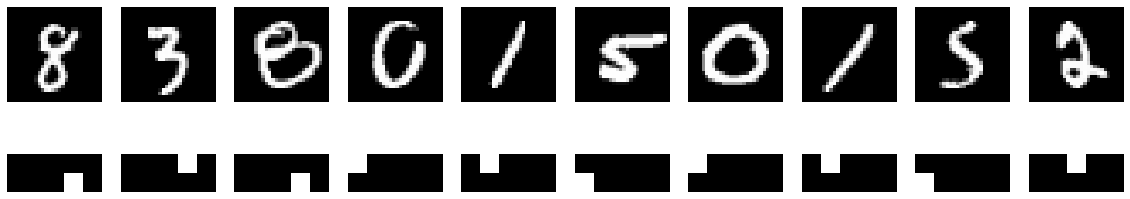

In [10]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(model_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Modèle avec décomposition des couches  

In [11]:
Conv2D_1 = km.Sequential(name="conv2D1")
Conv2D_1.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last",name = "conv2D1"))

Conv2D_2 = km.Sequential(name="conv2D2")
Conv2D_2.add(kl.Conv2D(64, (3, 3), activation='relu',name ="conv2D2"))

Maxpool = km.Sequential(name="Maxpool")
Maxpool.add(kl.MaxPooling2D(pool_size=(2, 2), name ="Maxpool"))

Dense1 = km.Sequential(name = "dense1")
Dense1.add(kl.Dense(128, activation='relu',name ="dense1"))

Dense2 = km.Sequential(name ="dense2")
Dense2.add(kl.Dense(N_classes, activation='softmax',name ="dense2"))


modeldecomp = km.Sequential(name="modèle décomposé")
modeldecomp.add(Conv2D_1)
modeldecomp.add(Conv2D_2)
modeldecomp.add(Maxpool)
modeldecomp.add(kl.Dropout(0.25))
modeldecomp.add(kl.Flatten())
modeldecomp.add(Dense1)
modeldecomp.add(kl.Dropout(0.5))
modeldecomp.add(Dense2)

modeldecomp.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2D1 (Sequential)         (None, 26, 26, 32)        320       
_________________________________________________________________
conv2D2 (Sequential)         (None, 24, 24, 64)        18496     
_________________________________________________________________
Maxpool (Sequential)         (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense1 (Sequential)          (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [12]:
modeldecomp.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

modeldecomp.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/step - loss: 1.1032 - acc: 0.8773 - val_loss: 0.0658 - val_acc: 0.9786
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1126 - acc: 0.9673 - val_loss: 0.0592 - val_acc: 0.9835
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0858 - acc: 0.9754 - val_loss: 0.0506 - val_acc: 0.9828
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0666 - acc: 0.9803 - val_loss: 0.0419 - val_acc: 0.9881
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0592 - acc: 0.9832 - val_loss: 0.0379 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0509 - acc: 0.9855 - val_loss: 0.0412 - val_acc: 0.9880
Epoch 7/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0438 - acc: 0.9869 - val_loss: 0.0329 - val_acc

In [13]:
modeldecomp_imgs = modeldecomp.predict(X_test_conv)
Conv2D_1_imgs =Conv2D_1.predict(X_test_conv)


In [72]:
Conv2D_1.get_weights()[0].shape

(3, 3, 1, 32)

In [60]:
np.all(Conv2D_1_imgs[:,:,:,10]==0)

False

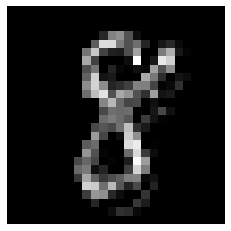

In [62]:
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(1,1,1)
ax.imshow(Conv2D_1_imgs[0,:,:,9])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [11]:
Conv2D_2_imgs =Conv2D_2.predict(Conv2D_1_imgs)
Maxpool_imgs =Maxpool.predict(Conv2D_2_imgs)
Dense1_imgs =Dense1.predict(X_test_conv)
Dense1_imgs =Dense1.predict(X_test_conv)

ValueError: Error when checking input: expected conv2D2_input to have shape (26, 26, 32) but got array with shape (28, 28, 1)

In [ ]:
model_imgs = model.predict(X_test_conv)


In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(6, n, i + 1)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display output first layer Conv2D
    ax = plt.subplot(6, n, i + 1)
    plt.imshow(Conv2D_1_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    # display output second layer Conv2D
    ax = plt.subplot(6, n, i + 1 + n)
    plt.imshow(Conv2D_2_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display output  layer Maxpool
    ax = plt.subplot(6, n, i + 1 + 2*n)
    plt.imshow(Maxpool_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display output first layer Dense
    ax = plt.subplot(6, n, i + 1 + 3*n)
    plt.imshow(Dense1_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display output last layer Dense
    ax = plt.subplot(6, n, i + 1 + 4*n )
    plt.imshow(Dense2_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()